### 1.0 Importing Dependecies:

In [28]:
# Importing dependencies:
import pandas as pd
import numpy as np
from scipy import stats
import string
import re

from matplotlib import pyplot as plt
import seaborn as sns

# Tokenizers
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim.models as gs
from gensim.models.phrases import Phrases, Phraser
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns

# Set custom preferences for displaying and visualizing data
sns.set_style('white')
pd.set_option('max_colwidth', 120)
pd.set_option('max_columns', 200)
pd.set_option('precision', 2)

%matplotlib inline

### 2.0 Importing Data:

In [34]:
df = pd.read_json('data/strings/recipes_raw_nosource_fn.json')
df_1 = pd.read_json('data/strings/recipes_raw_nosource_epi.json')
df_2 = pd.read_json('data/strings/recipes_raw_nosource_ar.json')
df.head()

,p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,kRBQSWtqYWqtkb34FGeenBSbC32gIdO,PmoGGX9RC5zbMJXtZH1SKzWKLFX4Aii,g2RYP1spIUlAYsytDMsdfLNQEOnLUrO,94NWE4F4C5NzgH0zYqSdmPM/G55BjKO,HdIbPB/8cgk17hAzbc2jUN4VBn//QKS,mC7Nb4F2S.DMCjZ39kzS/ak9GqEp4iO,QaFfhzgVliz840HdAnIypaGteQn5q3K,2ZlbPBIZEDWBdGFcJ/KhApHyOTYvt.G,8zGobobyDsaZYEw2dC0aOx5OMhA.TK6,GFhRq1LHg7bITZxzrQAdN1vt4U/9AXq,1NTEgJqoZSeiOR3lIYJpY6MdJy8J9oe,bB.av.HvROUULt52UwCNhYjmFwFMcEe,R1AQFiWULG/FuRSEB/.qFwcAbj.Phu.,RrewJ0.1fBlHmLH3BaXji7y2D08.KKK,z8enrwKc4Z3gxVmuxOKMZI/6GKSt1N2,pKpcLCAbXuvJJA3IZVlEhNjhOsBw15K,1Yls1UOBlB8tCWEQBJud.hEpzr15KIC,MoNU9eS8AI7BA07L/NbQkMgMdAhU43W,0HTC6/JWf4bJnNhpnYq8wqdew1bjJfO,HhWW9P3PtcVFgJa0A/ILP1QkY9u.XV2,6EcFqHg6GCifvTAJ/wqdNPIQJKhpyLi,WGZp7rKLW7ZheJIAtz/P8ZRzz7mqmlS,q68RErl7vzM2apk72GE/pEn0CVOEZry,esOZ0jNZz7beIh14E0KO/W8x/K/jRve,HwwWzw4M8OFnirNJvatbCn1k8TAtHc.,5t9WTRW1LmAZijA8EHHZ9v5LAhGfDOu,3sIf1qZuDOUV.tbEkqvAZGRfGLlTCgC,V5GdC6vvg9J71EWy50B55LojJoBZMjG,k3nUcqWBqw04GVwcooooX4QgMIhNObC,Sr5NOGRwFL2Et29RpmmnmgggA.9QAHK,QSFgCm1C3roLQYIYcnNmQHcKv11woyG,USvt1m2a7RwPmcqzD0/Au3VIrhP1RfS,h.BGRIoIdDmHwh72bF0aoCOluCXKkqW,wosCcAjyrLqlGtKyeu3SrclW91lI8n.,WPeQwcG9YD7MZrMQ4FdAlRS5LkZAdrC,zPd4EpB9aJLKw7nDkKoLv68L2kyNVU2,ygpfQqCl4qS.B5rEE3XBmCfJcqY3KMu,51qro2lQOQbj.oGlsu9NbnQF83QjUuK,JyR61cAN81XDUH0elFITpIuPO0Wwnqa,wg7Frz5wokYazNqF7awKz/s/iXZX/5e,/qlwIX5k7wiNvn/1FTAH0QbLp2BVsWi,BOj.9Z7aA2FJTIKXqDuyPCVoWr9goAq,Ayq3syHvYUYoss1fz2Wv.UvyHUIN3wq,73ftuME6qPNdYWIlaky2J0XOJOvAMJu,ZP4/HHU4BtVBSfMUrUekTgSuFWdQEHC,xcjKuDBYLjAZU2Lc.xx7JHP5uwlh9.6,/HUAnS1MX7NzQAzmotNaPMbfhY1fYJO,fmC2JZRdPGhUZIPolMvAXU1/04LhdTG,xUUxs21Yy/iJWUmxmh.FKdNbVG2x8vW,OqmpC0c1Vy/1R5aGuF088FGIdRh8j9C,1tAP4ORwXi3Yeu9tfXirB2DNx21Fz/2,eEXCa.uU9DMKTeahKcU1tbb3Ia9rQPu,FCC2urvO9mHp9bCAp7KPV83zx7c1UNy,VBDEjC.UD6rn4JIsTqPDDJuiBgKRfSK,bwc/vXzRZUuW6JcRzS6W4lRkcL9UucS,ZBh9cfJ9.gZ2VOQKATD97UQdTMuGCDe,ax1bstcxp2Jmead4/9kIU8y6PV9fWC6,fVwHfTpUGiVReEQnTmLx8FBKKKuiksa,aroKnRI/YmBU8PerQgA1Jy9.oG2CHUK,4fg4NJItPy1zldCCF/K1mKGWKmaiCWC,mTVAlxIQnIUW5up85bAxFtVGaRihvuG,3Ls4pGzlapIaiUm2uzXepC64aOQL.Va,19iEErd.Fr67OyPu567TOd.JSpGBwPW,RQkTYhUFn7gw.c/HYp.WNdwFoiM9x5O,NLMk5I0BmNo5JEIL1NVBa6WigZa4iyu,RDaMh0kExw9oKKur.AtcLDhOJ58dVl.,XiYLgl6PQ2vNg59HnRAswxt3Bq5rIoC,TZtt.EUUcWEbazOH.6IySAZkpNEghzm,Z4uw9xHk39TWHE3cXxBgngdP4RqOVE6,tdvuEB/I9vJ.Dl1adSwt8gBDrHu5Cj.,qFVyk1jfdVfvSmop3H0vaodYaXIoHrO,ftmm5mYRAdbFeALejOaBjTyOL21MIjy,17Na9VBWFUxCXZiu.dPzItUBwV5Tkl2,SkToMETyobW.5FogkWHv1FGSytaYHoC,FTHh4mhJ1lI0lDd7VvrPiY08orSFt.q,A2gMlrAFP90OEMlC5YUyEN6HtENArxa,Y27UiMiNPgtf02VHCrI1wZ/Jx4Qjpnm,AihwG.LMlNqIrRUnCt4foYhMIbsdijq,.gkPCiAAtkpkS1eJtU/0GVHztYteklC,Lbn2YKfJ0cLkH.p64RO6B0GXbg.kahG,Y9scOUYH1Fdw8kC2/inyTPTBAW.bRue,Kr1bfkd10/oZrRHjPjf90X5ILWTTh8q,Dp2yUVIwInIaYptX6y26sBVO3em5cHC,zeWnoMErrPxvKBMb.RTBuMg7dLDwUrK,X0cf84hJBj9hi0vfyE92V3KMRCJv4IO,D7rLKyjMqUS65AEmopOQBFFQy0aLGjq,fJ2qXt3u4j/qqUbW1yzRIonspUl4i.e,arTM0lewN6mJ67PHjV8eMxbSxcUddFq,CfoDP1bfLKJ17bUS54sbUd9FaiytSsG,2LN7W2uMONUnyIsrbFB8oMe3rPkJMZu,ja5geQpSygF3XDJt1.f.6FdAO5pMgXC,StsWlh4NT9c5yKPDYLaw6ZQswzgQmXW,xdENEhwipFN7TMBEViAJ6m1dbbeobgm,a5OVE/z1pw6R14RlYps4osEIWI9DwUi,XFTt0ctKsf/FBfRyqFquv/P3inz/Dxm,me90QPHLRM1h9WIMKqA8sx8fU.zu9yG,...,/xCEJ8ocHiIGDt/EcSjK8HAM4PnNspC,HSX/Bm0WPg8GK.XYX7czMXZq6Ahgv2e,.YOFEZd2P99kcFhYaKD.cseOP.RmZLS,67bjAGdz8SBW5xEIQKMUx5B0uAWz/nq,UnRhHmSUopCNhV8h/ddBH164q5WCxm6,w3leeLqcwHG1KtABGB2jTYIZY/aYRrm,Dpjp/HdkUWgdZoeLAdaAWVCKA6orul2,kTfEstYWy5kmLzb4iu6ODxXm/5t6uEK,7ItN7OX4QL8LiKHvVh3Z0P.nVkLNVGK,dc2ea8kvbWjKCvX5KHVZZuX1t1EXriG,OrwH7YmteKnvKRGeDYdvVJP3qOD/mPG,7cANYLJPIG1.0tqB18WTtUl8MF/n2fG,PZVI8UEiOJFuR38iGhMOFUVJ4D/zvb2,i9npwJJQLKwMBZ3Ido7pJR9wiUb/tK.,P1lv5kGc94mJDoKY/EYZ26GrYMPXi3i,I3M.ztTXQevPKVACxER2QvMN2SyRR3S,mqJhraO0V8V/HWCuBpBmOP5/rdLdVx2,kSWq.MPB.X4cr5YKuBo71ErcN2..31i,suqjRg9qCtasawkDEGk9FyXlZO/mViW,O2ZIoPG0qw.B3/ceRKB04DS8mMmSHYK,p2PNBHEy9ZEZ8KZGhgw3cK.ZpsZpa.e,PODmrqhAKu/ZuyUKeIkftVDYyVmE4GG,kq9cFT9aWTgOTtUS/cJck8dr1XRNP/q,LDOELWUFxnAFxyqQECQW5nY39Usp6R6,dvXvlZBf2tFewYrFvaBCQhBZhCw

In [35]:
df_1.head()

,05zEpbSqcs9E0rcnCJWyZ9OgdH0MLby,mF5SZmoqxF4WtIlhLRvzuKk.z6s7P2S,oQV5D7cVbCFwmrDs3pBUv2y.AG0WV26,Z9seBJWaB5NkSp4DQHDnCAUBTwov/1u,bB3GxoAplVZeoX3fzWNWyeECtQFxw6G,FHQAJvovVtPyKWlzgFEHgSUJsCM2Tjq,Jt7RKsNPY7/1QrOjuPEomP/s6mD2AvO,1rBWKEw7vZjXA97NmHGS3VHq1iVX9c.,agTMHTysNlAOyMM3zQlXVu4qbJrLmqa,Y..dFCvcwNW4gdogZ3DqLUETR2x.uA2,wAybSELYww/.RDBrZyskjgx0XueW1Mq,JnAmtoxgN/vW8NPycwzFW/bCYQH0vXO,.iwUfWzkQDtbd5uTDvXyM4A4oluMBCO,2RAoUiVRmYrenvEQU2RKVZWJ9Xmxmo6,tZyoBQtCH9yXlhi6P5MvIizmh0Eb62a,z26qlU48ZmhyEvus3NzvTn1vEmjq8Kq,F90CEW4q0ddU7FarDR7WMsqupZ0FV0S,AcKTUX.eKHroYkKa3qpDQKTzrTqSGdG,8GxEhUS4Eom2nDziT7bwq95jlIIKbFO,4iFC4rMMmwoUzRcMPdWlCiHwNZjlqXu,lSGw36jAaKzy0keFcuR0/VGHzLU3Bya,AfmDjxEO2JmKPlVSxoiNnnPPnFijMGW,al7MiUkzHgNVuJ4F8KOFoFV9b7YxYIC,L9w.rdGaaZkQul8xrIceNPFy8Pa08KO,QZETPtmRHncmATglMlQWH7ah0vLvJQm,0UTBFcok1o1cX9Jwq0I8V/724GOxfxO,wVFEklKHzz1DGDbLarXJ.qKy9OXxbLu,DfUB0AB0N/rVkM/t29Fsoq9Hhmy1NGq,zwTm5Cma5WEL.ZTFDYsp2gVlk1oyKHO,1GW9hHi9W3xTy0w825dfvfWxpyOZYVG,sl5OwEu93D0AFIYab6WE4acg/Q./Wea,FlJde6SONl9KSRvqEv6cqYbcAUp4Ke2,2rbnaWpaHTlHRAE0fj.WvWElST8d6wS,L9MMXOAFF5BGz6jUxlIYsJyD1cwXTQO,t3AWAsosWT/cHeGx24daHM/.Px9Ooqm,9NmjGfDKbROQZnGqW19JOL4vdP2Q.M.,W274jkaAmPmIlBQfKRvObkeSs4iMJiu,T1Hz082zmL14UqzcJQnAxWXG3YHf5BC,ocE02vtEZnh2eTegpRZIiq3tlT5GImu,YiFh/nPFhxqZKv42OsIjqricwz/ikM.,fbBd7pt42ZN3HTOwdyHTN8utmiX6SZG,gojD4rjkZjVZ27GZT8iji2Kca5Dlxoi,KM.PK1CLhMZdksHLoAChyUv77I4tlp2,G5/k09NoyXjxeAytpjU4p7GbiD.Jjbe,mdzCKJuu24tgO0h12oNV2HL/BYbUcrS,NBnqgLVUPvxaYA2FdeUioiLGeEKf5by,NvvDeL9GvbC.jqsMm3nDLB0Ws4ecrj6,18bLHtVZnrkjhu6PBnws6KnFj4uhaxK,GnwHgkziQU7G40TsIZPFZ57BlfrVPLC,iATEo.tHpvzYqhCOq/agdFUdWS2fIKG,zuR8xg39JTBuxsqqnlIGOzlvaffiU3W,83zo6AflyU/E2UPabSMqINJj6nN8yJK,4z.bl9jOmzK2rV2IrU1Cjb6iWpjyPv.,giqB/zi/uj54hdaC3EIBkfuv59vk66S,P0DOpdzaspjJWu35/GhAe1aJRMK01aK,EfDyT3UovxWpR8Y6TuHmwlI8fv.VKS.,ytajd2p6y6U2a.nX1zi/v0OOWV/0lo.,8PDjYlxYxi3/OmQ9OQv1dDHSIz0uBCO,2LE/6Tfq0uU4ej13qBxLfm49qPwWJGK,1FfQqLurA37jNYVPWaiG3zFRGB227x6,jvUaqUIy.9BEIfOdVmLICTrZ.qJzZBa,MgSE9tEe9DSepS1O1lBVgpmUvHP9gVW,3lQ0HKGQL8hOP1PfStlbkLa.4vnW/v2,eFIC7q.SxkKfOkkavijaA7uhy6UpM7i,XHv9fxLKF9MG7C5ERTqYwT0VXOvRGkS,CuwF1u7AaAIov3HQh4P/9q1IbSwMoQ.,uaTebxFqAkWgZmhoHyPFVfT8oQ7urYi,vEANR6tS9bg4SRJNrbucOeuJ56wOcpa,DlFzhKeoDKXZYGb/uApiljEG7iGgsK2,gxxEhqOACx9zpDVfExh6Dcbwemzj5Ri,s9o2tIT3eCYeu.8SgaLcln/QxM7B.yq,yjMurJgjCnJWyHH.UOQNM2qHHP3/Tva,YH9YAtGB9IAFdBrypTEcOZDm9yvXQmG,XJwHwqNOThITv4ECPCVcY916DMCFZke,5yVLhAlqa/Te0qj0qdseEnVT.dTdvEG,B.SE4Dl3.piQR7sKszzOi2GnyaFIQ5G,ELlGUiRsl30AGK5IwiFYsjeZJaqd3D6,vY9orVpAO/yS5f9mJTciykjOluc3h3K,DGzUr1D/v.OGUcuWUDpEtu/vGJ7VYPa,Tl7ffkzeRvjftscOd4/YZc2ArPH0P1S,zzSlSaw5M.pu2vVf/zFk1I/u.WKUIie,0hrG6aNjJYW79TkJvgiNId57LUC5Z1W,bHcJo4MH3pY9lkvg31cSNmStqAQl6aa,AmZ8t7mn1z.2D3CKC6yUTbjmuaiTY3a,b/08.iwbPp7/ObhF.nibJBfBFCvI7z2,c6.V7YXKmJHW1WE4SvoH.Si1zZbfP3K,eTk6qzzgEcEl0AXijnEVhjy/jDEccqy,7McmJC6ZstP7fJU2lQdIhb4CnVv/2we,VEp72wH9WCZxFYTbmW7YH9BJnBThIKK,NkGVP/ZCGpe6QH4VUtaNtl5.oVwlPuG,lljAxXSsIVM/mr1McTdQKVnCcDyahJu,StK18N8j/imOoh.pyjUL6YKiB/ipz46,J19HY2MluKig1.CKFx9jT/DvwAEAqY.,Ndhv9SxiNFwqucdetBwcFJV0MvINasS,7.zJseTE2fzRFtFXMNK1D7R3yKrtf52,euEezbaYXk0iMjkwF56ElIVkZIbf93a,tFRDww3SFsTHPfsk2PRmyDqgMW651Fu,JR3fzpc/Tsa6SL74Xdtv0Cjo2.ehNYG,JvxqyEHIm4MQWR/NI8SoLe0vegWIxkC,1h3SVbimWVPw3jck1OTS5RD/RigS8pa,...,EuYRmjhIUthczeQKftY9iEPKBpX1I7u,.bBYT.jv9xieRKRO7ZcdNMUrdBckaam,uS8yDXWT08WtfCEUl1J1opgE.KVNtMi,WSXa/IpJEU.6W3JteRUhkQSQVTzXOEK,Be9DXOpgXYeYvq4e5UI7FM7C9szhcUW,mc4bFAn.MYZbsROyWAEHxxx8kGl39h6,lCYPUtWbYBoGbBv2kAufoK0QE4Yp6XK,VH8sfql6T2/R8RhpyB4UiLD/yQ6ytF6,jnS8L6BfE6DfE3/LR8oKcfYQsG/83OO,uolxDqhQSf2r6.P9zaXaX7UPuWShbLa,rFwsN0BSpxq74lsjM4X4yQMDdhNIbXK,wOP4qC9NKpXsETJSMP1x/WHewJTw/Vi,6t9GmrWZMyI/bHhVI9hw1SNYUq.XHrW,9OqDmuabzUTkWjOUNd/0VOK9fOKp6E.,Yuq8VQP0uyfgU6O/SRSPp4rUTvXrh5W,rurC4wLl.3HYgIpfuOdF3dMo9VdCq3e,jmVHK8m5wVbhJAEqdyKQ7pgAzc2yjPS,Aig45/1KfkNDgoURExuqQVnbc36qUzW,ecq61nO1igvIzBrSz6JLN4ounQbE0Ry,ThsIkdThLL8bJZ6fOWuV0kZqI7yiahK,n6xwqS96c7FEGyHLNxT979PpoHBohaK,ujDg9pUb58mTIprMUtipApTyOCxzBAS,xO5wQAiasDyfJZYbOcos2OHwVM.VFtK,gEd92EmdWtUZevcQPozUVXp3CvWo9Ve,mco1KvlysZhCKSf6ciVc/oz0EvG

In [36]:
df_2.head()

,rmK12Uau.ntP510KeImX506H6Mr6jTu,5ZpZE8hSVdPk2ZXo1mZTyoPWJRSCPSm,clyYQv.CplpwJtjNaFGhx0VilNYqRxu,BmqFAmCrDHiKNwX.IQzb0U/v0mLlxFu,N.jCksRjB4MFwbgPFQU8Kg.yF.XCtOi,kq.naD.8G19M4UU9dVvJgHtpfo.l/eC,lYrgWNn00EXblOupzM3tL0jGr9O0CB2,Fu0DgGYFUGwc0BBlN6r20o/ihOVs5bO,MBRNtqELRRuv8zJH4k7Aba2bmIc2A3C,ZPyPoMiNvgAfrKcRpH9FEYV/XsPZBsW,ATMxl11LFhuvTbTi9.kX4nhYE50HeJ.,2GV8OxOPn2uKhaCVoPw36Lg6tvNws9W,ybAYM2rjpeMIxNBRfvU3OBaykkHIp5u,MubUROykDQT0pSI.F.pZIQ6FtFu/aVK,MV4wp/7ZxjlGseBT0psPW91AIeHvQ1W,VQF9R/8uOgzCTKrPg.TnlcbeeNkRwzO,wSt5d14gCsdnoX1mc.f9/p2VDGtOCJm,unlpjtMrJRWxUfBoSSnSF6G6WIFjKkS,Kt0fyyj39oSYwc0nb1QeIVS/P45UxPm,6IxFBbINcu1cvybDMy6UFji/ynUox9C,Qdv27B/unN67bh4EB.jH60KfHNQjPpW,u9.4XrD7E6t4Rfx7xSIfeNtFyMowhuC,L0PCxyJV0SXAneB/xeVcHLQt5g1PRr6,2.5UveE.bkE3NqxTDFlhk7Xhf6Cw7Mu,NFOSisLons3uKgwIRzlmtxbEuPmBVxm,seDVeo8d/hNZt1IoUzSZUtGYseWCoja,VxibW5ljaeGrBLoIg6HjiAUu5jOodBG,xrLOYL9osYcG.1Wud7ymkgulTHrojOq,W16LIKfAPvl.JW4REiKBVnrhJLVsjPa,I2lwk9BQlPPMKf3yLlc3dLwa67BG0yu,rky8e0ifBVbpWCFd.vRctUO041Ki7ZO,Fvbzkkqy1/56JZfR2IgOlVM2Jr..Aku,/Zcq7FFI9oOzqwcuY9zEsddkJDP9XbG,99PNE9tq7cmoGh5LvVtzOhXxYiw9qnC,8KFNy5O0vA7My.Wc1lCXrTk2yPBPUp6,gfaCm6kHYkSEn.mU/gZ9V.TsYe4kDEe,mSARhmSYlNTO.ydTZLphFOUuUZD7M3K,j8xfG0j/KQxcGj70imMBDQadvck/Y/e,cyHqD.DIB9XrPO8gZuH5bRiu2hMRBnm,MVqD97HCNdZq9HWOVxx8YXp427Si5gy,XPZVJf3403ZY8TaQjhl/MAEFAAzsXRa,J8NArm6hsz0b6yVcc.UZBEvexvjG8Sy,UxpOTenDP2ohz10AFKIA.1XXWkwZdyK,oqGqJnVANYmlpH13aos8qaC38VJwkle,MZmglJzuIZ50kxpzdMyF6T3OS0M1tHS,avzjXwt2v6oKupuE9JNncnjebguqTUq,0HYXGhT.orY/mzW6gbjmNn/l4iRGOue,l455Uj3RbPQWBSJUmj9EqK0Tc.cZQpi,TnK5Ciy8mscPibFx2jTJHbu5zDC4wYm,YnMBkYpLIX.7CwVjJpMHO52IHOhxPAi,DvnbTZ2ePbVTHXmrc.n13YopTHeo9WO,k7qcbQSKW.Cej1OLEtw3Y9GpL/Zx0dG,xnjwYdh.H9w34Sl6Magj5a/O/aZfdO.,DKJZmOthu.RmwQiQ/.Qn.UcdScCc5Ay,XH9xcGEA0RGwYaGUFHOGku.EmgG.4UW,FJTYczDeAzLZrDW4.02x6sIxiv7sJFm,f.1fMufblq19L2lUSuQvWNI31oZvSxe,tZgm5sdag2ebITxUprEAgnoApUyX04K,2aJ2cl3CRe29W8ROwo/v41CWE2qdfaK,vYbVvMVc9wOiKn3opPqIxS1gVNSAIre,IfNzG8aBpG/fnBMB2ZAv536YVqLTD.G,7e5jeLd6.Q2kat3EaroPPSLLAiuD7Ma,jqPri0WJFBePvcAW72YAhC.MYbGm6nK,LZCaBYwZnyQ/fOAskBw9hEP5dfuFVWi,FbpOmvNPN6PgEVIBsiFrVpgIFfmWYgu,/tZeVpM8U.MsGv1FY8bDD3IzuQJri4G,DdXKR1kpGBoPtOVFy6zc00OT4z6xoJO,XrHOR3s/j.yEsa1vMjCiHmnH385yKCm,vR7rVhXdC/7q8mNrivDwRdSciLRvnLa,4JGjgjL9NIgOe4Truv5Ku.fKQS7v6q.,Z470ZwwIMSFjSfOOLp56How4gfDD5JC,pCkhtSCUJzuOgFaPRmEHjXVAQAx6s.i,rDZ0RKJH3XN24b0AcYq.xEvrWT/vUDe,zFSV3sUvD.noC9XMQ8O7qXdEbsgNJXm,I2DzWJamzeouN38IaDHN9h7vPt0Nko2,LRoHBAZFeYjviizHAQWM7LkOKdzq/N2,p3go7FL1oWNfhu4fND7tNzYFlZ/vS0m,HMrba2uZU/zCd7CeC5wGZTKPlPKEndS,Kak0B9KPIMjib1zYDiDJUfrzsauTDsG,8yczB40n/hev2xe0t4RecozPoNPk8Yu,m2RjqLvwagdB43OyMAzC/9h8QHkohqG,58uQ1d8Q08zEOQ6qbJzg7nyHJWX4Q66,jTBan7Yu32ZIK.L719EiKnlUS26xbKu,3iHGHwV3IRm/iolIS78CEuS1R4EEtOi,bA6ELvmr8Tfld0rTPmcvQUYD2xtp/Yy,A19Frdd8.o/bNfORmAqbyf9t8Bv21Ui,7WKQ.11bCVj2i/uRzxqMmmRUPcdRyBy,3fQwiGqvuM8RWd.tOVlajARwMKwA2ne,TQLFlybf8VMQ1NNW42GKmam8Vh/5QQC,U/gtP5fRvGnpWbKR6nUaPkPPeKrF2uO,KM7VSbPRAjk6QQHthbtHa7RBcGUScTS,S30yAxZm08.3zpU2J4Ik0AZEnfkg0bO,kEEScv3I9aq7VxzOgcsSI2FyeSPD8O.,.AvQI1LPlun.tklhcDmiUxSG4Gzex76,iOvAOMRQhwiRk/0djvixhXSy21Ndj5y,cu.PPkdTeAWw3KrgheaUv6DcKvR61hO,K4luoiT2p7QXTzd8EcazxWYsrv1gEvW,oUBeflkmRQIXeoSB2B6NScFpqhof7Oe,/wZR/iNA65GRcrkZwOaYn3mkNao8LE.,4SKJyau413X817p8LAffto9iCyt6Nc.,...,7K7Q5Rd8I7tGi1aQsQ2V2dK4hx/VqMq,gR/0JZxaeskVp/JNPORlbct2XQAFNhq,9X.6c/hZpU9Mhx9IzLTvuhSHZbBEtiW,oJxgZhmZZBGx0WqFCQr.0nLEO4ySQPW,JuwIHyCmRoChvUfhJ2whpakjU8pPjPC,UXH2G1iapUY0OR.egGfPgHEV4iXTpda,E52TsFT8u6I9lq.J0CvNA22bs76j.Si,4kRmxt9k44w6.8hQZSlDijbt599GfY.,umPwLi1dhQUuPY9v118ZL.aW5hLQRQi,pyrcG8RuzFklBlchnwtszKvYPHK5DwK,2MzzCpIChvTSrecGXG5zgMah6DRZwZe,a8OUtK/vFsPfm8BKMmLL3KNFZbS4XVm,rDJHHC5dg3xY88mzvexYRoonRcrcBAu,SuIeKYr8.kS7V85cVWmwtxuOCquWyKK,.bdY21nVYXcMoLEyvqNoow9dhDIJteO,8M48sma2WZX09bieg3..T6bfvuMYA/G,4Rxf1s1IKHc3L8Wlfzpc1I2Re0aik0y,b341fkNs/o/dv0OY6.vid3jMWdTI1SS,k73APOYqIXfUIQLXX/3JskZ/8Cp7.li,xoXdPHbTFxapkVEwFFn31T78RwKBrMu,.fMykkEgpVweYECIC5m8JtC.YfTF7x2,corbxHsQlkzVNJl4Aj6k/FeN82gIpUy,OLVmwXFByhAUrhgFQc17iKGm6fH7wPe,SWc/HRfpuj4bULvx4LEXSf4ufldZMNm,9LLF370i1JmXFeToPxuu8XnTo9X

In [37]:
df_merged = pd.concat([df, df_1, df_2], axis=1, sort=False)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, instructions to picture_link
Columns: 125164 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
dtypes: float64(517), object(124647)
memory usage: 3.8+ MB


### 3.0 Data Pre-Processing:

#### 3.1 Transposing Data:

In [38]:
df_clean = df_merged.transpose().drop('picture_link', axis=1)
df_clean = df_clean[['title', 'ingredients', 'instructions']]
df_clean.head()

,title,ingredients,instructions
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,"[1/2 cup celery, finely chopped, 1 small green pepper finely chopped, 1/2 cup finely sliced green onions, 1/4 cup ch...","Toss ingredients lightly and spoon into a buttered baking dish. Top with additional crushed cracker crumbs, and brus..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,"[2 pounds skirt steak, cut into 1/2-inch dice, Kosher salt and fresh cracked black pepper, 4 to 6 slices thick-cut a...",Watch how to make this recipe.\nSprinkle the steak with salt and pepper. Set aside.\nIn a large Dutch oven (preferab...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,"[1 1/2 cups dried black beans, picked over and rinsed, 8 cups water, plus 1/4 cup, 2 cloves garlic, 3 tablespoons ve...","In a large saucepan, let the beans soak in enough cold water to cover for 1 hour and drain. Return the beans to the ..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,"[1 1/4 pounds ground chuck, One 15-ounce can tomato sauce, 1/2 teaspoon salt, Freshly ground black pepper, 8 ounces ...",Watch how to make this recipe.\nPreheat the oven to 350 degrees F.\nBrown the ground chuck in a large skillet. Drain...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,"[1 cup rice, brown, medium-grain, cooked, 1/2-cup quinoa, 2/3-cup sweet red peppers, raw, 4 oz. white tuna, canned i...",Special equipment: sushi mat\nCook the brown rice and quinoa in 3 cups of water (35-40 min.). Bring to a boil for 2 ...


In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125164 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124595 non-null  object
 1   ingredients   124647 non-null  object
 2   instructions  124473 non-null  object
dtypes: object(3)
memory usage: 8.8+ MB


#### 3.2 Dropping NaN Values:

In [40]:
df_clean.isnull().values.any()
print("Number of row that have missing values:\n", df_clean.isna().sum())

Number of row that have missing values:
 title           569
ingredients     517
instructions    691
dtype: int64


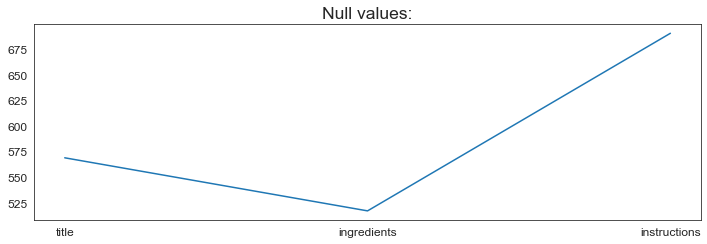

In [41]:
plt.figure(figsize=(10, 3.5))

plt.plot(df_clean.isna().sum())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(size=12)
_ = plt.yticks(size=12)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

Dropping missing values since we won't loose too much data.

In [42]:
df_clean.dropna(inplace=True)

In [43]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean['ingredients'] = np.where(df_clean['ingredients'].isnull(), df_clean['title'], df_clean['ingredients'])

In [44]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124473 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   title         124473 non-null  object
 1   ingredients   124473 non-null  object
 2   instructions  124473 non-null  object
dtypes: object(3)
memory usage: 3.8+ MB


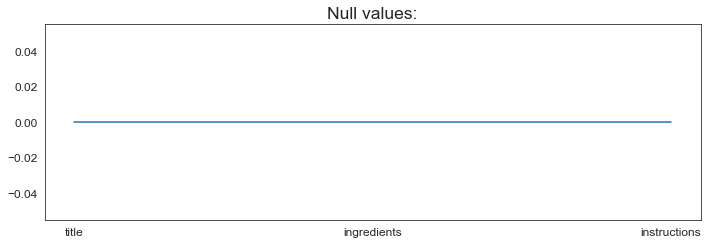

In [45]:
plt.figure(figsize=(10, 3.5))

plt.plot(df_clean.isna().sum())
_ = plt.title('Null values:', size=17.5)
_ = plt.xticks(size=12)
_ = plt.yticks(size=12)

plt.tight_layout()
plt.savefig('graphs/null_values.png')
plt.show()

#### 3.3 Preporcessing Ingredient Column:

In [46]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

In [47]:
# Function that cleans text directly:
def clean_text(text):
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

In [55]:
%%time

df_clean = df_clean.astype(str)
df_clean['ingredients'] = df_clean['ingredients'].apply(lambda x: clean_text(x))
df_clean['instructions'] = df_clean['instructions'].apply(lambda x: clean_text(x))
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,"Toss ingredients lightly and spoon into a buttered baking dish. Top with additional crushed cracker crumbs, and brus..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,Watch how to make this recipe. Sprinkle the steak with salt and pepper. Set aside. In a Dutch oven (preferably ename...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 cup water garlic bring water boil lowe...,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,"In a saucepan, let the beans soak in enough cold water to cover for 1 hour and drain. Return the beans to the pan wi..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,Watch how to make this recipe. Preheat the oven to 350 degrees F. Brown the ground chuck in a skillet. Drain the fat...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 cup water 3540 min bring boil 2 minute reduce heat stir cook re...,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,Special equipment: sushi mat Cook the brown rice and quinoa in 3 cups of water (35-40 min.). Bring to a boil for 2 m...


In [56]:
df_clean['ingredients'].apply(lambda x: len(x.split(" "))).mean()
df_clean['instructions'].apply(lambda x: len(x.split(" "))).mean()

108.74473178922337

#### 3.4 Remove meassurements

In [57]:
# Defining measurement words and prep words:
measure_tokens = ['cup', 'can', 'teaspoon', 'tsp', 'tablespoon', 'tbsp', 'pound', 'lb', 'jar', 'bottle', 'stick', 'about', 'pounds','cups'
                  'pinch', 'appx', 'half', 'optional', 'milliter', 'micro', 'ounce', 'small', 'large', 'medium', 'envelope', 
                  'ear', 'piece', 'drops', 'oz', 'bunch', 'slice', 'spoonful', 'advertisement']

prep_tokens = ['diced', 'stewed', 'chopped', 'crumbled', 'peeled', 'minced', 'fresh', 'divided', 'cooked', 'washed', 'softened',
               'sliced', 'deveined', 'shaken', 'finely', 'toasted', 'frozen', 'mixed', 'cut', 'squeezed', 'cracked', 'halved',
               'roasted', 'grilled','dried', 'freshly', 'ground', 'coarse', 'beaten', 'blend', 'blended', 'seeded', 
               'grated', 'chilled', 'garnish', 'discarded', 'powdered', 'cooled', 'sifted', 'drained', 'granulated', 'crushed']

In [58]:
df_clean["ingredients"] = [' '.join(i for i in x.split() if i not in measure_tokens and prep_tokens) for x in df_clean['ingredients']]
df_clean["instructions"] = df_clean['instructions'].apply(lambda x: ' '.join([word for word in x.split() if word not in measure_tokens and prep_tokens]))
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,"Toss ingredients lightly and spoon into a buttered baking dish. Top with additional crushed cracker crumbs, and brus..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,Watch how to make this recipe. Sprinkle the steak with salt and pepper. Set aside. In a Dutch oven (preferably ename...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,"In a saucepan, let the beans soak in enough cold water to cover for 1 hour and drain. Return the beans to the pan wi..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,Watch how to make this recipe. Preheat the oven to 350 degrees F. Brown the ground chuck in a skillet. Drain the fat...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,Special equipment: sushi mat Cook the brown rice and quinoa in 3 cups of water (35-40 min.). Bring to a boil for 2 m...


#### 3.5 Creating New Columns For Vectors and Vectorizing:

In [63]:
df_clean['ingredients_vector'] = df_clean['ingredients']
df_clean['instructions_vector'] = df_clean['instructions']
df_clean.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...


#### 3.9 Word Tokenizer:

In [64]:
%%time

df_clean['ingredients_vector'] = df_clean['ingredients_vector'].apply(word_tokenize)
df_clean['instructions_vector'] = df_clean['instructions_vector'].apply(word_tokenize)
df_clean.head()

CPU times: user 1min 36s, sys: 507 ms, total: 1min 36s
Wall time: 1min 36s


,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,"[12, celery, finely, chop, 1, green, pepper, finely, chop, 12, finely, green, onion, 14, chop, parsley, 1, crabmeat,...","[toss, ingredient, lightly, spoon, butter, bake, dish, top, additional, crush, cracker, crumb, brush, melt, butter, ..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,"[2, skirt, steak, cut, 12inch, dice, kosher, salt, fresh, crack, black, pepper, 4, 6, thickcut, applewood, smoke, ba...","[watch, make, recipe, sprinkle, steak, salt, pepper, set, aside, dutch, oven, preferably, enamel, cast, iron, medium..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...,"[1, 12, dry, black, bean, pick, rinse, 8, water, plus, 14, 2, cleave, garlic, 3, vegetable, oil, 1, green, bell, pep...","[saucepan, let, bean, soak, enough, cold, water, cover, 1, hour, drain, return, bean, pan, 8, water, garlic, bring, ..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,"[1, 14, grind, chuck, one, 15ounce, tomato, sauce, 12, salt, freshly, grind, black, pepper, 8, egg, noodle, 12, sour...","[watch, make, recipe, preheat, oven, 350, degree, f, brown, grind, chuck, skillet, drain, fat, add, tomato, sauce, 1..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...,"[1, rice, brown, mediumgrain, cook, 12cup, quinoa, 23cup, sweet, red, pepper, raw, 4, white, tuna, water, drain, sol...","[special, equipment, sushi, mat, cook, brown, rice, quinoa, 3, water, 3540, min, bring, boil, 2, minute, reduce, hea..."


#### 4.0 Saving cleaned DF for Analysis and Training:m

In [65]:
df_clean.to_csv(path_or_buf='data/strings/df_clean.csv')

#### 4.1 Dropping and Cleaning Columns:

In [66]:
df_clean_loaded = pd.read_csv('data/strings/df_clean.csv', index_col=0)
df_clean_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124473 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   title                124473 non-null  object
 1   ingredients          122952 non-null  object
 2   instructions         124434 non-null  object
 3   ingredients_vector   124473 non-null  object
 4   instructions_vector  124473 non-null  object
dtypes: object(5)
memory usage: 5.7+ MB


In [67]:
# Filling some recipes with the name of the title since they are not considered as null:
df_clean_loaded['ingredients'] = np.where(df_clean_loaded['ingredients'].isnull(), df_clean_loaded['title'], df_clean_loaded['ingredients'])

In [68]:
df_clean_loaded[df_clean_loaded.isna().any(axis=1)]

,title,ingredients,instructions,ingredients_vector,instructions_vector
DxsP.opjapGRa4zq4XMrI5M2Zz6EGue,Title,1 rice 2 milk 3 wheat,NaN,"['1', 'rice', '2', 'milk', '3', 'wheat']",[]
uvcjJ07lrvDkPRXKUcA8CrKLgJbD4hq,Southern Stuffing,6 brioche 1 country ham cub 4 1 butter 2 onion chop 4 rib celery chop 3 mince garlic 12 parsley chop 14 green onion ...,NaN,"['6', 'brioche', '1', 'country', 'ham', 'cub', '4', '1', 'butter', '2', 'onion', 'chop', '4', 'rib', 'celery', 'chop...",[]
nR3sz.W1PSU74zn8m3NDDYC96iEI.lW,Title,1 acerola,NaN,"['1', 'acerola']",[]
GsAQK3AG..YxEw7lKIy3PcZ31MY1FEG,Gas Station Cue,dry rub choice 1 tri tip roast 1 12 2 1 rack pork baby back rib,NaN,"['dry', 'rub', 'choice', '1', 'tri', 'tip', 'roast', '1', '12', '2', '1', 'rack', 'pork', 'baby', 'back', 'rib']",[]
GTI7DQPe/IIaXmQbITOlrtAiykcHiie,Dark Chocolate as a Snack,1 dark chocolate,NaN,"['1', 'dark', 'chocolate']",[]
76zDLGsfc5S.M60Zgn9PqbONi4Ky2yO,New England Stuffing,6 sourdough bread cub toast 1 slab bacon cub 4 1 butter 2 onion chop 4 rib celery chop 12 chop fresh herb parsley th...,NaN,"['6', 'sourdough', 'bread', 'cub', 'toast', '1', 'slab', 'bacon', 'cub', '4', '1', 'butter', '2', 'onion', 'chop', '...",[]
6AdCFCZR4cr1NzOtloWzWuOmDewvFGG,Title,1,NaN,['1'],[]
CIpbN9qEZeLIg0YNW8aC6zwfR8CRYte,Real Time Cooking -- Out of the Fridge and Pantry,garlic ginger thin soy sauce rice wine vinegar sesame oil oyster sauce hoisin sauce sambal fish sauce 3 crab brand n...,NaN,"['garlic', 'ginger', 'thin', 'soy', 'sauce', 'rice', 'wine', 'vinegar', 'sesame', 'oil', 'oyster', 'sauce', 'hoisin'...",[]
yJcaFDZcwAdeOxs2pIhWRz72Xnz/ysC,Title,3 unsalted butter 14 chop onion 2 chop green bell pepper,NaN,"['3', 'unsalted', 'butter', '14', 'chop', 'onion', '2', 'chop', 'green', 'bell', 'pepper']",[]
pKBZl5/whnhq65P6/TbUjEfQ0jM85Se,Southwest Stuffing,3 country white bread cub toast 3 whole wheat bread cub toast 1 andouille sausage 4 1 butter 2 onion chop 14 roast g...,NaN,"['3', 'country', 'white', 'bread', 'cub', 'toast', '3', 'whole', 'wheat', 'bread', 'cub', 'toast', '1', 'andouille',...",[]


In [69]:
df_clean_loaded = df_clean_loaded.dropna()
df_clean_loaded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124434 entries, p3pKOD6jIHEcjf20CCXohP8uqkG5dGi to 2Q3Zpfgt/PUwn1YABjJ5A9T3ZW8xwVa
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   title                124434 non-null  object
 1   ingredients          124434 non-null  object
 2   instructions         124434 non-null  object
 3   ingredients_vector   124434 non-null  object
 4   instructions_vector  124434 non-null  object
dtypes: object(5)
memory usage: 5.7+ MB


In [70]:
df_clean_loaded.to_csv(path_or_buf='data/strings/df_clean.csv')

In [73]:
df_clean_loaded.head()

,title,ingredients,instructions,ingredients_vector,instructions_vector
p3pKOD6jIHEcjf20CCXohP8uqkG5dGi,Grammie Hamblet's Deviled Crab,12 celery finely chop 1 green pepper finely chop 12 finely green onion 14 chop parsley 1 crabmeat 1 14 coarsely crus...,toss ingredient lightly spoon butter bake dish top additional crush cracker crumb brush melt butter bake preheat 350...,"['12', 'celery', 'finely', 'chop', '1', 'green', 'pepper', 'finely', 'chop', '12', 'finely', 'green', 'onion', '14',...","['toss', 'ingredient', 'lightly', 'spoon', 'butter', 'bake', 'dish', 'top', 'additional', 'crush', 'cracker', 'crumb..."
S7aeOIrsrgT0jLP32jKGg4j.o9zi2DO,Infineon Raceway Baked Beans,2 skirt steak cut 12inch dice kosher salt fresh crack black pepper 4 6 thickcut applewood smoke bacon 14inch dice 1 ...,watch make recipe sprinkle steak salt pepper set aside dutch oven preferably enamel cast iron mediumhigh heat render...,"['2', 'skirt', 'steak', 'cut', '12inch', 'dice', 'kosher', 'salt', 'fresh', 'crack', 'black', 'pepper', '4', '6', 't...","['watch', 'make', 'recipe', 'sprinkle', 'steak', 'salt', 'pepper', 'set', 'aside', 'dutch', 'oven', 'preferably', 'e..."
o9MItV9txfoPsUQ4v8b0vh1.VdjwfsK,Southwestern Black Bean Dip,1 12 dry black bean pick rinse 8 water plus 14 2 cleave garlic 3 vegetable oil 1 green bell pepper finely chop reser...,saucepan let bean soak enough cold water cover 1 hour drain return bean pan 8 water garlic bring water boil lower he...,"['1', '12', 'dry', 'black', 'bean', 'pick', 'rinse', '8', 'water', 'plus', '14', '2', 'cleave', 'garlic', '3', 'vege...","['saucepan', 'let', 'bean', 'soak', 'enough', 'cold', 'water', 'cover', '1', 'hour', 'drain', 'return', 'bean', 'pan..."
5l1yTSYFifF/M2dfbD6DX28WWQpLWNK,Sour Cream Noodle Bake,1 14 grind chuck one 15ounce tomato sauce 12 salt freshly grind black pepper 8 egg noodle 12 sour cream 1 14 curd co...,watch make recipe preheat oven 350 degree f brown grind chuck skillet drain fat add tomato sauce 12 salt plenty fres...,"['1', '14', 'grind', 'chuck', 'one', '15ounce', 'tomato', 'sauce', '12', 'salt', 'freshly', 'grind', 'black', 'peppe...","['watch', 'make', 'recipe', 'preheat', 'oven', '350', 'degree', 'f', 'brown', 'grind', 'chuck', 'skillet', 'drain', ..."
kRBQSWtqYWqtkb34FGeenBSbC32gIdO,Sushi Renovation,1 rice brown mediumgrain cook 12cup quinoa 23cup sweet red pepper raw 4 white tuna water drain solid 2 tb seaweed ke...,special equipment sushi mat cook brown rice quinoa 3 water 3540 min bring boil 2 minute reduce heat stir cook remove...,"['1', 'rice', 'brown', 'mediumgrain', 'cook', '12cup', 'quinoa', '23cup', 'sweet', 'red', 'pepper', 'raw', '4', 'whi...","['special', 'equipment', 'sushi', 'mat', 'cook', 'brown', 'rice', 'quinoa', '3', 'water', '3540', 'min', 'bring', 'b..."
